In [84]:
import pandas as pd
from datetime import datetime

In [85]:
df = pd.read_csv("train.csv")

In [86]:
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [87]:
list(df.columns)

['Id',
 'Province_State',
 'Country_Region',
 'Date',
 'ConfirmedCases',
 'Fatalities']

In [88]:
print(list(df.Country_Region.unique()))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', '

In [89]:
df.describe()

,Id,ConfirmedCases,Fatalities
count,20580.000000,20580.000000,20580.000000
mean,14685.500000,514.939116,21.080952
std,8487.230117,4541.261768,287.758197
min,1.000000,0.000000,0.000000
25%,7335.750000,0.000000,0.000000
50%,14685.500000,0.000000,0.000000
75%,22035.250000,35.000000,0.000000
max,29370.000000,105792.000000,12428.000000


In [90]:
df.query("ConfirmedCases == 105792.000000")

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
9869,14070,NaN,Italy,2020-03-31,105792.0,12428.0


In [91]:
df.query("Country_Region == 'Italy'")

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
9800,14001,NaN,Italy,2020-01-22,0.0,0.0
9801,14002,NaN,Italy,2020-01-23,0.0,0.0
9802,14003,NaN,Italy,2020-01-24,0.0,0.0
9803,14004,NaN,Italy,2020-01-25,0.0,0.0
9804,14005,NaN,Italy,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
9865,14066,NaN,Italy,2020-03-27,86498.0,9134.0
9866,14067,NaN,Italy,2020-03-28,92472.0,10023.0
9867,14068,NaN,Italy,2020-03-29,97689.0,10779.0
9868,14069,NaN,Italy,2020-03-30,101739.0,11591.0


### Data Cleaning, Structuring, and Feature Engineering

In [92]:
df["NewCases"] = df.groupby(["Country_Region", "Province_State"]).ConfirmedCases.diff(1)
df["NewFatalities"] = df.groupby(["Country_Region", "Province_State"]).Fatalities.diff(1)
df.index = pd.to_datetime(df.Date)
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,NewCases,NewFatalities
Date,,,,,,,,
2020-01-22,1,NaN,Afghanistan,2020-01-22,0.0,0.0,NaN,NaN
2020-01-23,2,NaN,Afghanistan,2020-01-23,0.0,0.0,NaN,NaN
2020-01-24,3,NaN,Afghanistan,2020-01-24,0.0,0.0,NaN,NaN
2020-01-25,4,NaN,Afghanistan,2020-01-25,0.0,0.0,NaN,NaN
2020-01-26,5,NaN,Afghanistan,2020-01-26,0.0,0.0,NaN,NaN


In [93]:
df.query("Country_Region == 'Denmark'").Province_State.unique()

array(['Faroe Islands', 'Greenland', nan], dtype=object)

### Vizualization

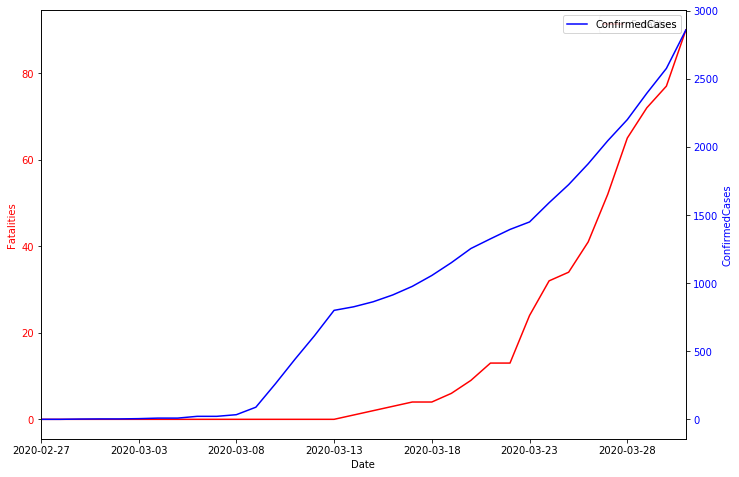

In [94]:
import matplotlib.pyplot as plt
import numpy as np

dk = df[(df.Country_Region == 'Denmark') & (df.ConfirmedCases > 0) & (df.Province_State.isna())]

f, ax = plt.subplots(1, 1, figsize=(7 * 1.6, 7))
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.1, wspace=0.2, hspace=0.2) 
dk.plot(x="Date", y="Fatalities", ax=ax, label="Fatalities", color="red")
ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel("Fatalities", color='red')
ax2 = ax.twinx()
dk.plot(x="Date", y="ConfirmedCases", ax=ax2, label="ConfirmedCases", color="blue")
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylabel("ConfirmedCases", color='blue')
plt.show()

### Forecast # of fatalities and infected in the future

In [56]:
test = pd.read_csv("test.csv")

In [57]:
test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-19
1,2,NaN,Afghanistan,2020-03-20
2,3,NaN,Afghanistan,2020-03-21
3,4,NaN,Afghanistan,2020-03-22
4,5,NaN,Afghanistan,2020-03-23


In [58]:
dk["NewCases"] = dk.ConfirmedCases.diff(1)
dk["NewFatalities"] = dk.Fatalities.diff(1)
dk = dk.iloc[1:]

C:\Users\Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
# Linear Regression
from sklearn.linear_model import LinearRegression
import math
dk["range"] = np.arange(1,len(dk) + 1)
length = dk.shape[0]
print(f"Length of data is {length}")
index = math.floor(length/2)

# split to train and test set
Y_train = dk.ConfirmedCases.values[0:index]
X_train = dk[["range", "Fatalities"]].values[0:index]
reg = LinearRegression()
reg.fit(X_train, Y_train)

# predict on test set
Y_test = dk.ConfirmedCases.values[index:]
X_test = dk[["range", "Fatalities"]].values[index:]
preds = reg.predict(X_test)

Length of data is 33


C:\Users\Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [60]:
len(dk.Date[index:])

17

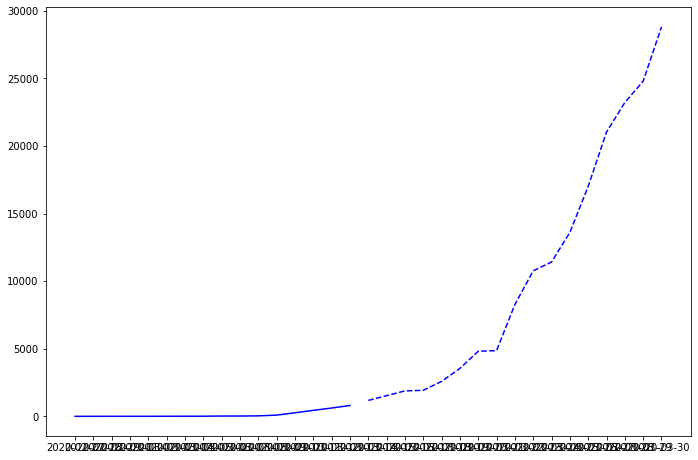

In [61]:
# import seaborn for nice plots
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

dk = df[(df.Country_Region == 'Denmark') & (df.ConfirmedCases > 0) & (df.Province_State.isna())]

f, ax = plt.subplots(1, 1, figsize=(7 * 1.6, 7))
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.1, wspace=0.2, hspace=0.2) 
#ax.legend(prop={'size': 16})
#ax2 = ax.twinx()
#dk.plot(x="Date", y="ConfirmedCases", ax=ax, label="ConfirmedCases", color="blue" )
ax.plot(dk.Date[0:index], dk.ConfirmedCases[0:index], label="ConfirmedCases", color="blue")
# dates = pd.date_range(dk.Date.max() + timedelta(days=1), dk.Date.max() + timedelta(days=len(preds)))
ax.plot(dk.Date[index:-1], preds, label="ConfirmedCases", color="blue", linestyle='dashed')
#ax2.tick_params(axis='y', labelcolor='blue')
#ax2.set_ylabel("ConfirmedCases", color='blue')
#ax2.legend(prop={'size': 16})
#plt.savefig(f"prod_FFA_forecast_{steps_ahead}.png")
# plt.grid(True)
plt.show()